In [7]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv('Downloads\PreScreen_r3_pw - 1234\PreScreen_r3/ingredient.csv')

In [9]:
data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [10]:
#analyze descriptive statistics
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [11]:
#check data types
data.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

In [12]:
#check data shape for (rows & columns)
data.shape

(214, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


# data.info()


In [14]:
#check if there are any missing or null values. Luckily there is none!
data.isnull().any()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

In [25]:
#Findings
#1 All Data are numerical value (float data type)
#2 There are no null values

#Next lets analyze the numerical(continous and discrete) variables

In [28]:
# List of numerical variables
num_vars= [var for var in data.columns if ((data[var].dtypes == int) or (data[var].dtypes == float) or (data[var].dtypes == complex))]

print('Total numerical variables: ', len(num_vars))

# visualize the numerical variables
data[num_vars].head()

Total numerical variables:  9


,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [102]:
#function to calculate mean and median for every numerical column
def ingrediants_mean_median(column):
    print(f"{round(column.mean(),2)}\t\t{round(column.median(),2)}")

for var in num_vars:
    if var == num_vars[0]:
        print(f"Mean\t\tMedian")
        

    ingrediants_mean_median(data[var])

Mean		Median
1.52		1.52
13.41		13.3
2.68		3.48
1.44		1.36
72.65		72.79
0.5		0.56
8.96		8.6
0.18		0.0
0.06		0.0


In [100]:
#Funtion to calculate variance and standard deviation for every numerical column
def ingrediants_var_std(column):
    print(f"{round(column.var(),2)}\t\t\t{round(column.std(),2)}")
    
for var in num_vars:
    if var == num_vars[0]:
        print(f"Variance\t\tStandard Deviation")

    ingrediants_var_std(data[var])

Variance		Standard Deviation
0.0			0.0
0.67			0.82
2.08			1.44
0.25			0.5
0.6			0.77
0.43			0.65
2.03			1.42
0.25			0.5
0.01			0.1


In [ ]:
#Findings
#1 Mean and median are almost close to each other
#2 Not much variance except for two columns c and g. (value above 1)

In [103]:
#  list of discrete variables - my assumption is that a discrete column has less than 20 unique values
discrete_vars = [var for var in num_vars if len(data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


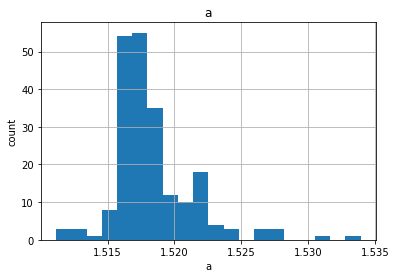

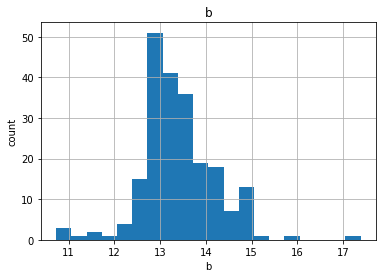

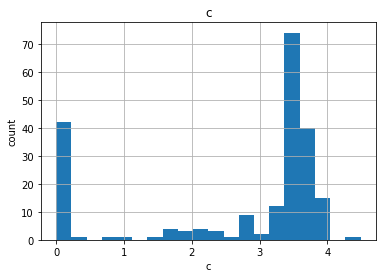

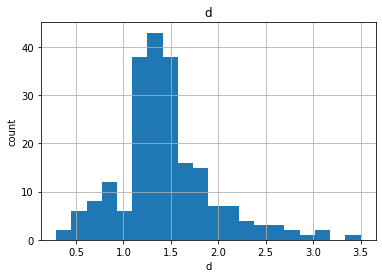

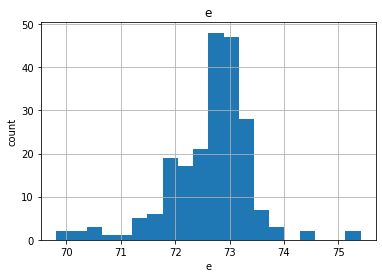

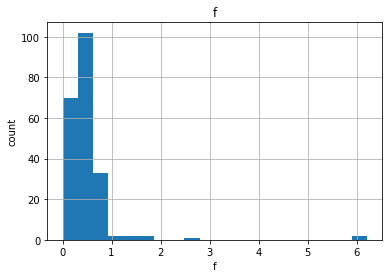

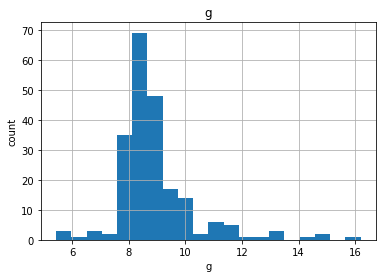

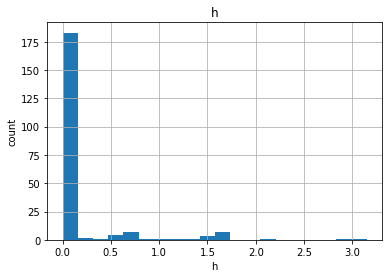

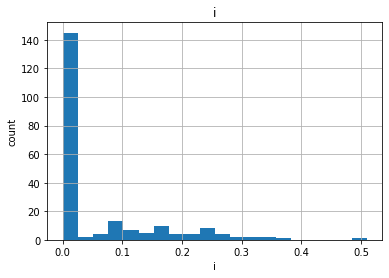

In [104]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(data, var)

In [109]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='baseline', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

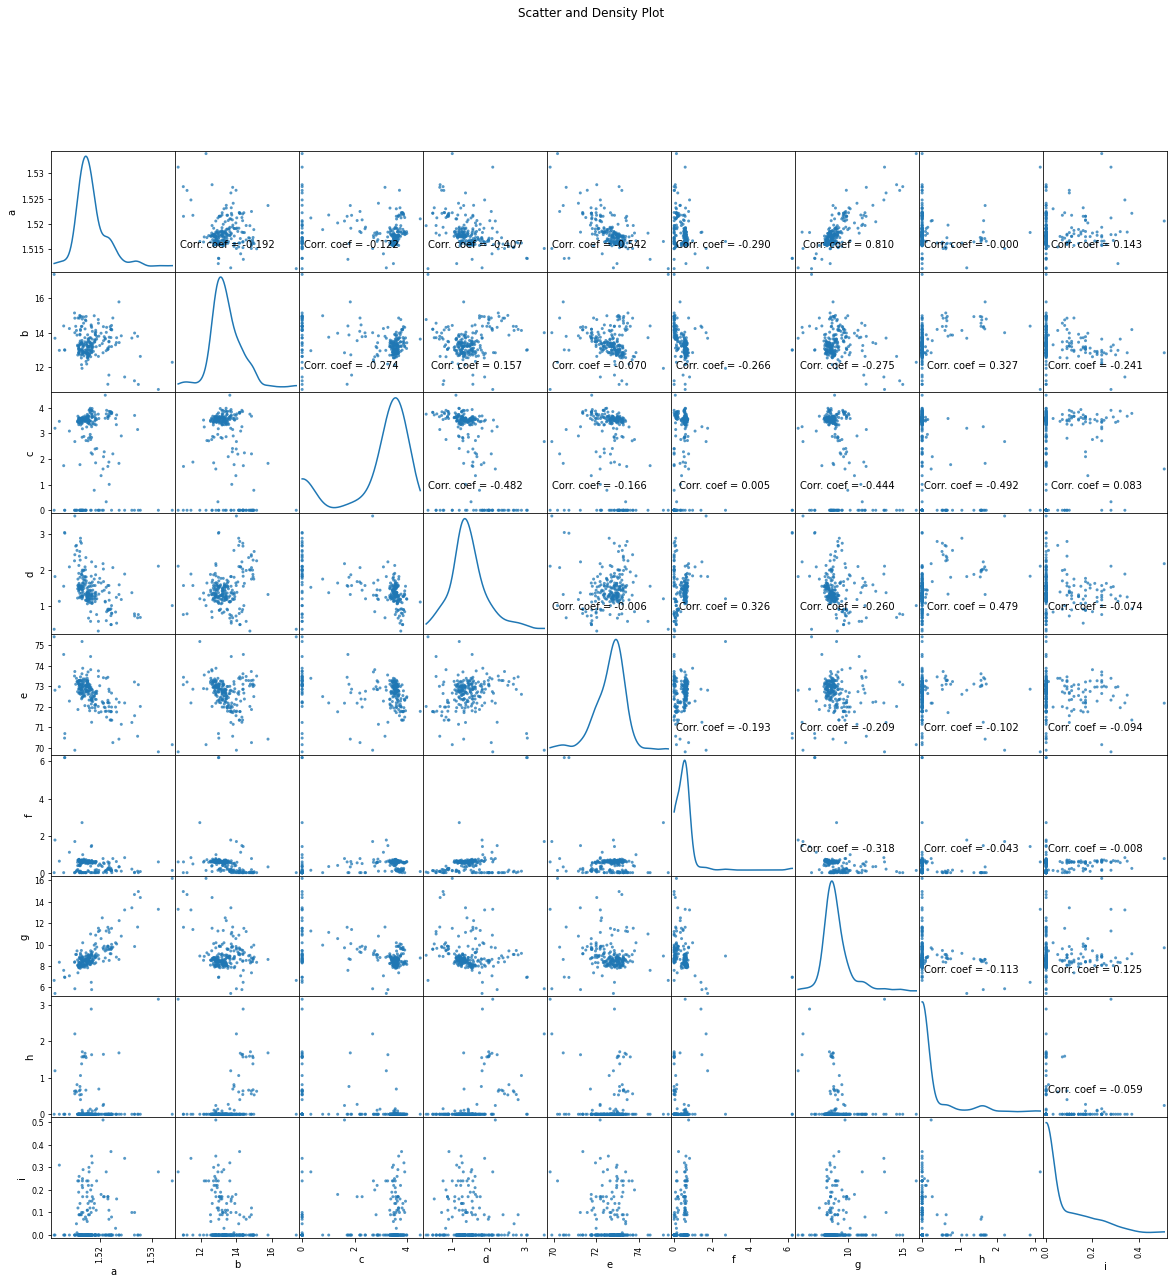

In [107]:
plotScatterMatrix(data, 20, 10)

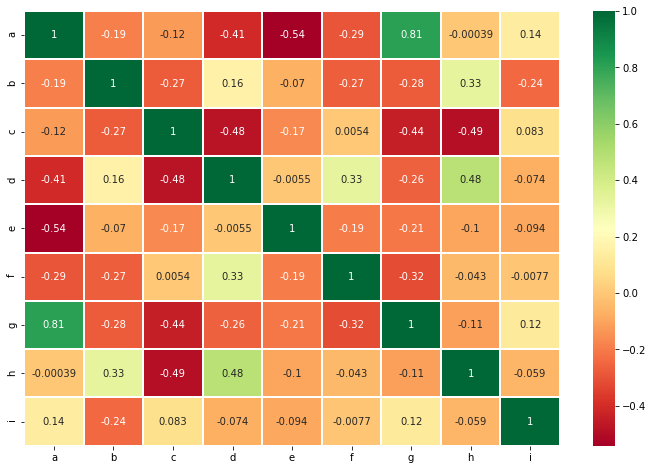

In [110]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
#Finding
#All the features are normally distributed except for f, h, i.
#a & g are highly positively corelated and e & a are highly negatively corelated.

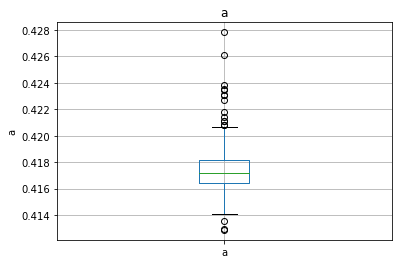

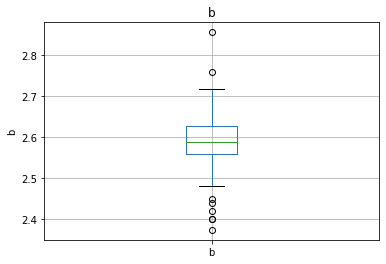

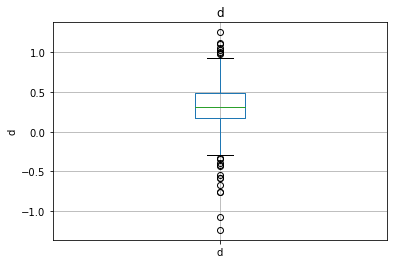

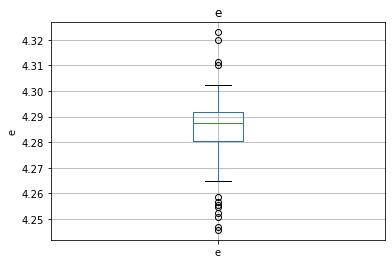

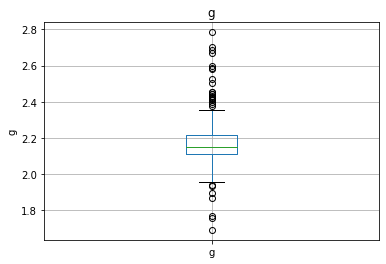

In [111]:
# let's make boxplots to visualise outliers in the continuous variables 

def find_outliers(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
    
for var in num_vars:
    find_outliers(data, var)

In [115]:
#Lets perform some clustering with Kmeans clustering and hierarchical (dendogram) clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [116]:
X = data.copy()

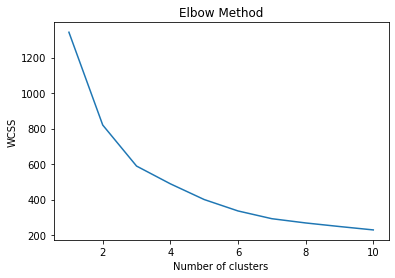

In [117]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#FINDING
#Elbow method suggests we should have 3 clusters

In [118]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [119]:
pred_y

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [120]:
len(pred_y)

214

In [121]:
data['predictions1'] = pd.DataFrame(pred_y)

In [122]:
data.head()

,a,b,c,d,e,f,g,h,i,predictions1
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1


In [123]:
data.predictions1.value_counts()

1    162
0     31
2     21
Name: predictions1, dtype: int64

In [124]:
# data.drop(['predictions2'],axis=1, inplace=True)
X.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [125]:
#Lets scale the features using minmaxscaler and see if we can slighlty better results
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
X_scaled[:5]

array([[0.27216857, 0.3443609 , 0.78841871, 0.43613707, 0.52142857,
        0.08695652, 0.27973978, 0.        , 0.1372549 ],
       [0.88235294, 0.        , 0.        , 0.56386293, 0.        ,
        0.09339775, 0.73141264, 1.        , 0.54901961],
       [0.52019315, 0.38796992, 0.79732739, 0.16510903, 0.38928571,
        0.01932367, 0.44052045, 0.        , 0.05882353],
       [0.28665496, 0.27518797, 0.78396437, 0.35514019, 0.59642857,
        0.09178744, 0.28903346, 0.        , 0.        ],
       [0.30640913, 0.40601504, 0.88641425, 0.27725857, 0.47857143,
        0.09339775, 0.2527881 , 0.        , 0.        ]])

In [127]:
pred_y = kmeans.fit_predict(X_scaled)

In [131]:
pred_y

array([0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [132]:
data['predictions2'] = pd.DataFrame(pred_y)

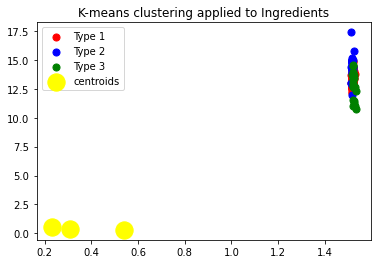

In [140]:
#Lets visualize the clusters and their centroids together

plt.figure(2)
plt.scatter(X.iloc[pred_y == 0, 0], X.iloc[pred_y == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(X.iloc[pred_y == 1, 0], X.iloc[pred_y == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(X.iloc[pred_y == 2, 0], X.iloc[pred_y == 2, 1], s = 50, c = 'green', label = 'Type 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to Ingredients")

plt.legend()
plt.show()

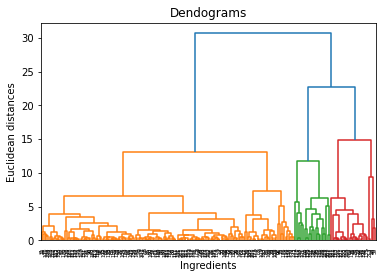

In [142]:
#Use dendrogram to find the optimal number of clusters


import scipy.cluster.hierarchy as sch
dendrogram_1 = sch.dendrogram(sch.linkage(X, method = 'ward'))
fig.set_size_inches(12,8)
plt.title('Dendograms')
plt.xlabel('Ingredients')
plt.ylabel('Euclidean distances')
plt.show()

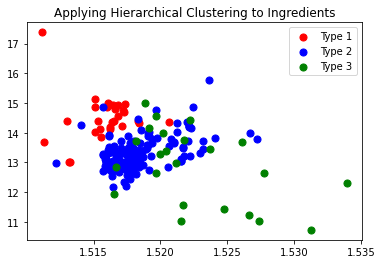

In [143]:
from sklearn.cluster import AgglomerativeClustering 

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 50, c = 'green', label = 'Type 3')
plt.title('Applying Hierarchical Clustering to Ingredients')

plt.legend()
plt.show()

In [144]:
data['predictions4'] = pd.DataFrame(y_hc)

In [145]:
data.drop(['predictions2','predictions1'], axis=1, inplace=True)

In [146]:
data.head()

,a,b,c,d,e,f,g,h,i,predictions4
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1


In [147]:
#Finding
#1.Lets look at the summary of each clustering techniques and measure the class counts against each other using cross tab
#2.The predictions from both algorithms looks quite similiar with a few exceptions.